# Does The Income, Employment Status, and Interest Rate Affect or Influence The Borrower's Loan Performance?

## Investigation Overview

In this investigation, I wated to look at the potential impact of employments status, income, and interest rate on loan performance, as determined by loan status variable among borrowers in Prosper. The analysis aimed to determine if these factors had any correlation or affect the borrower's ability to repay their loans.

## Dataset Overview

This data contains 113.937 loans with 81 variables. There are some columns for various characteristics of each loan, such as the loan amount, current status, and borrower's income. There are also columns for informations about the borrower, including their credit score, employments status, and whether or not they are a homeowner. Other columns provide information about listing such as the listing's Prosper rating, the date the credit profile was pulled and more. Some columns were dropped to make the dataframe more accessible.

In [1]:
# Import all packages and set the plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load the dataset into a pandas dataframe

loan_data = pd.read_csv('prosperLoanData.csv')
pd.set_option('display.max_columns', None)


In [3]:
# I am copying the dataset to not affect the orginal.
clean_loan = loan_data.copy()

In [4]:
# I will drop all the columns that I do not need for this analysis to be more efficient and have a better view of the columns that I am interested to analyze.
clean_loan.drop(['ListingKey','ListingNumber','ListingCreationDate','ClosedDate','LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)',
              'ListingCategory (numeric)','BorrowerState','IsBorrowerHomeowner','CurrentlyInGroup','GroupKey','DateCreditPulled','FirstRecordedCreditLine','TotalCreditLinespast7years','OpenRevolvingAccounts',
              'OpenRevolvingMonthlyPayment','InquiriesLast6Months','TotalInquiries','CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years','PublicRecordsLast10Years','PublicRecordsLast12Months',
              'RevolvingCreditBalance','BankcardUtilization','AvailableBankcardCredit','TotalTrades','TradesOpenedLast6Months','IncomeVerifiable','TotalProsperLoans','TotalProsperPaymentsBilled',
              'OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber',
              'LoanMonthsSinceOrigination','LoanOriginationQuarter','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees','LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss',
              'LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments','PercentFunded','Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors','TradesNeverDelinquent (percentage)'], axis = 1, inplace = True)
              

In [7]:
ordinal_var_dict = {'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$100,000+','Not displayed']}
for var in ordinal_var_dict:
    ordered_var=pd.api.types.CategoricalDtype(ordered=True,categories=ordinal_var_dict[var])
    clean_loan[var] = clean_loan[var].astype(ordered_var)

In [8]:
# First, I replace some records in the income range from not employed to 0.
clean_loan['IncomeRange'] = clean_loan['IncomeRange'].replace({'Not employed':'$0'})

## Distribution of Loan Status

Approximately 52% of the borrowers in the dataset have paid their loan on time, while 34% or roughly 40,000 have fully repaid their loans. Additionally, there is a certain percentage of borrowers who have defaulted on their loans, as evidenced by the distribution of delinquent days, which includes outliers with more than 120 days delinquent.

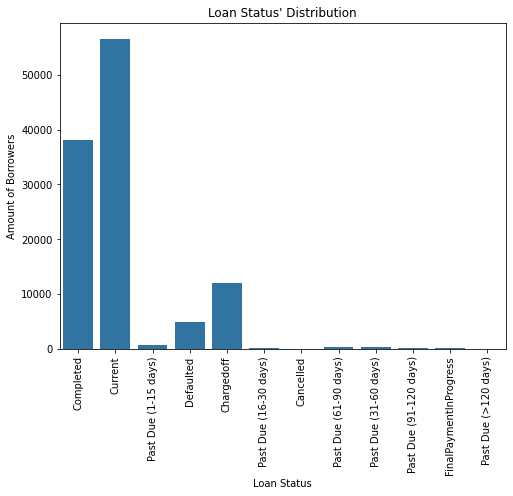

In [22]:
fig = plt.figure(figsize = [8,6])
base_color = sb.color_palette()[0]
sb.countplot(data=clean_loan, x='LoanStatus', color = base_color)
plt.xticks(rotation = 90)
plt.xlabel('Loan Status')
plt.title("Loan Status Distribution")
plt.ylabel('Amount of Borrowers')
plt.savefig('Loanstatus.png')
plt.show()

## Income Range vs Loan Status

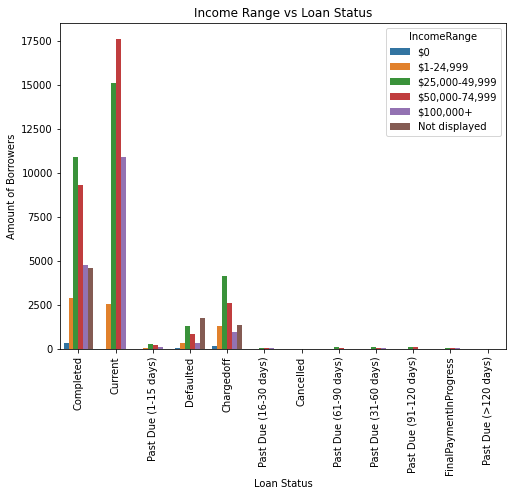

In [23]:
# Bar plot, I decide to leave the color palette to see clearer each income range.

fig = plt.figure(figsize =[8,6])
bar_plot = sb.countplot(data = clean_loan, x='LoanStatus', hue='IncomeRange')
plt.xticks(rotation=90)
plt.title('Income Range vs Loan Status')
plt.ylabel('Amount of Borrowers')
plt.xlabel('Loan Status')
plt.savefig('Income vs loan.png')
plt.show()

A majority of loans fall under the categories of "current" and "completed." Furthermore, it has been observed that the income ranges with the highest number of loans falling under "current" and "completed" are USD25,000 - USD49,999 and USD50,000 - $74,999. This result aligns with the expectation as these income ranges have the highest number of borrowers. However, it has also been found that the income range does not have a significant influence on loan delinquency.

## Employment Status vs Loan Status

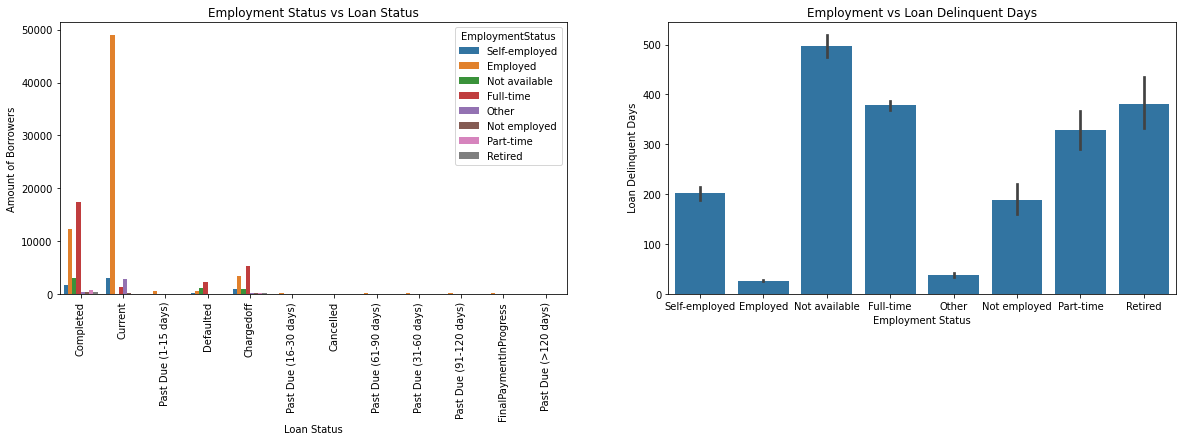

In [24]:
# Plot employment status vs loan status
fig = plt.figure(figsize =[20,5])
plt.subplot(1,2,1)
bar_plot = sb.countplot(data = clean_loan, x='LoanStatus', hue='EmploymentStatus')
plt.title('Employment Status vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Amount of Borrowers')
plt.xticks(rotation=90)

# plot Employment status vs delinquent days 
plt.subplot(1,2,2)
sb.barplot(data = clean_loan, x='EmploymentStatus', y='LoanCurrentDaysDelinquent', color=base_color)           
plt.title('Employment vs Loan Delinquent Days')  
plt.xlabel('Employment Status')
plt.ylabel(' Loan Delinquent Days')
plt.savefig('Employment vs loan.png')
plt.show()

A majority of employed borrowers have a current loan status. However, an unexpected finding is that a greater proportion of full-time workers have paid off their loans compared to other categories of employed workers.Furthermore, On average, employed borrowers generally have the least number of delinquent days on their loans. Contrarily, full-time, part-time, and retired workers had a higher number of delinquent days on their loans than those whore were not employed.

## Borrower's Rate vs Loan Status

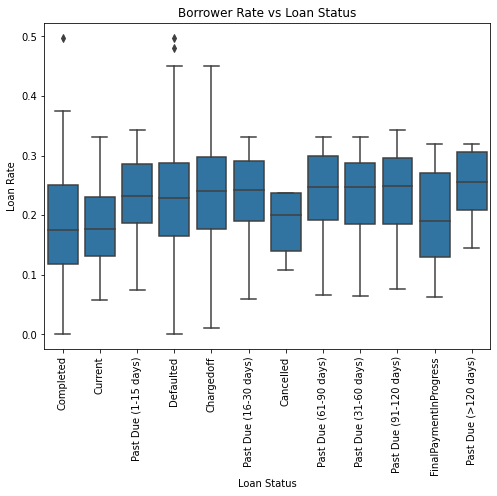

In [25]:
# Box plot to check the interest rate across loan status

fig = plt.figure(figsize =[8,6])
sb.boxplot(data=clean_loan, x='LoanStatus',y='BorrowerRate', color = base_color)
plt.title('Borrower Rate vs Loan Status')
plt.xticks(rotation = 90)
plt.xlabel('Loan Status')
plt.ylabel('Loan Rate')
plt.savefig('interest rate.png')
plt.show()

It has been observed that the majority of borrowers who received a lower interest on average have successfully "paid off" or pay on time their loans. Nevertheless, a notable proportion of borrowers who received an interest rate of 0% have defaulted on their payments.This suggests that there may be other factors that influence loan delinquency, in addition to the interest rate.

## Loan Status By Income Range and Interest Rate

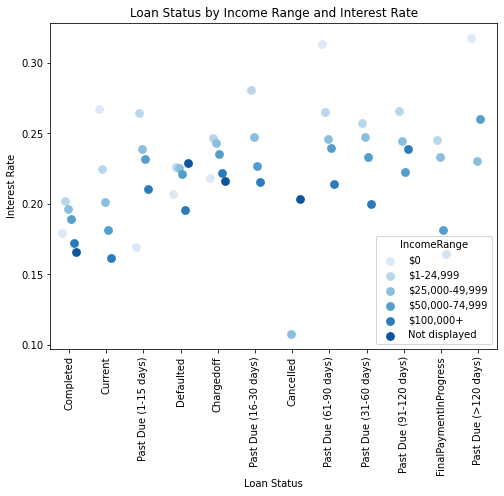

In [26]:
# I decided to not include the employment status since is implicit in a source of income.

plt.figure(figsize=[8,6])
sb.pointplot(data=clean_loan, x='LoanStatus',y='BorrowerRate',hue='IncomeRange', palette = 'Blues', linestyles = '',dodge=0.4, errorbar = None)
plt.xticks(rotation=90)
plt.title('Loan Status by Income Range and Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')  
plt.savefig('relationship.png')
plt.show()

There is a slight correlation between interest rate received, loan status and the income range. The Borrowers that have some source of income had fully paid off or pay on time their loans in comparinson with those with no income and a higher interest rate. However, these variables are not determined factors in whether the borrowers paid or not their loan, and imply that other variables might be affecting or influence their loan performance.